In [1]:
#import packages to read and perform analysis on the data(such as reading the file, plotting)
import pandas as pd
import numpy as np

In [2]:
#reading the dataset and display 5 random rows out of it
df=pd.read_csv("covid_19_data2.csv")
df.sample(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
6908,6909,03/19/2020,Macau,Macau,2020-03-19T01:02:56,17.0,0.0,10.0
8386,8387,03/24/2020,British Columbia,Canada,2020-03-24 23:41:50,617.0,13.0,0.0
10182,10183,03/30/2020,NaN,Saint Vincent and the Grenadines,2020-03-30 22:58:55,1.0,0.0,1.0
7104,7105,03/20/2020,NaN,Mexico,2020-03-20T14:13:08,164.0,1.0,4.0
7244,7245,03/20/2020,NaN,Kyrgyzstan,2020-03-20T14:13:36,6.0,0.0,0.0


In [3]:
#set the index as SNo for better as our step to clean and modify the data
df.set_index('SNo',inplace=True)

In [4]:
#drop the column which might not be of use
df.drop(['Province/State','Last Update'],axis=1,inplace=True)

In [5]:
#lets check the sample of 7 rows now
df.sample(7)

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
SNo,,,,,
8085,03/23/2020,Netherlands,9.0,0.0,1.0
2926,03/01/2020,New Zealand,1.0,0.0,0.0
4335,03/09/2020,Slovenia,16.0,0.0,0.0
5456,03/14/2020,Lebanon,93.0,3.0,1.0
536,02/01/2020,Australia,4.0,0.0,0.0
7421,03/21/2020,US,156.0,2.0,0.0
3922,03/07/2020,Armenia,1.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11299 entries, 1 to 11299
Data columns (total 5 columns):
ObservationDate    11299 non-null object
Country/Region     11299 non-null object
Confirmed          11299 non-null float64
Deaths             11299 non-null float64
Recovered          11299 non-null float64
dtypes: float64(3), object(2)
memory usage: 529.6+ KB


In [7]:
#since ['ObservationDate'] is a Object type, lets convert it to a Datetime format
df['ObservationDate']=pd.to_datetime(df['ObservationDate'])

In [8]:
df.sample(4)

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
SNo,,,,,
353,2020-01-29,US,1.0,0.0,0.0
10766,2020-04-01,Libya,10.0,0.0,0.0
3375,2020-03-04,Sri Lanka,1.0,0.0,1.0
5312,2020-03-13,Romania,89.0,0.0,7.0


In [9]:
#since we want to find the analysis on countries, create a Series which will group dataset based on the countries 
Country_group=df.groupby('Country/Region')

In [10]:
#Create a derieved column('month') which will have the months from the 'ObservationDate' column
df['month']=df['ObservationDate'].dt.month

In [11]:
df.sample(7)

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,month
SNo,,,,,,
7340,2020-03-21,Japan,1007.0,35.0,232.0,3
5471,2020-03-14,Russia,59.0,0.0,8.0,3
2492,2020-02-27,Mainland China,631.0,0.0,498.0,2
7917,2020-03-23,Albania,104.0,4.0,2.0,3
8702,2020-03-25,Denmark,132.0,0.0,38.0,3
10790,2020-04-01,Niger,74.0,5.0,0.0,4
6378,2020-03-17,Ethiopia,5.0,0.0,0.0,3


In [12]:
# grouping the data for countries 
India_data=Country_group.get_group('India')
US_Data=Country_group.get_group("US")
China_data=Country_group.get_group("Mainland China")
Australia_data=Country_group.get_group("Australia")

# Analysis on India

In [13]:
#finding the Sum of Deaths cases, Confirmed cases, Recovered Cases in India based on each month
India_death_sum=India_data.groupby('month')['Deaths'].sum()
India_Confirmed_sum=India_data.groupby('month')['Confirmed'].sum()
India_Recovered_sum=India_data.groupby('month')['Recovered'].sum()

In [14]:
India_death_sum, India_Confirmed_sum,India_Recovered_sum

(month
 1      0.0
 2      0.0
 3    226.0
 4    130.0
 Name: Deaths, dtype: float64, month
 1        2.0
 2       84.0
 3    10252.0
 4     4541.0
 Name: Confirmed, dtype: float64, month
 1      0.0
 2     42.0
 3    822.0
 4    339.0
 Name: Recovered, dtype: float64)

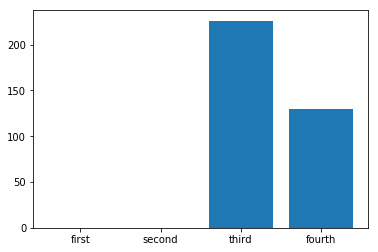

In [16]:
import matplotlib.pyplot as plt
x=[1,2,3,4]
y=[0,0,226,130]
tick_label = ['first', 'second', 'third', 'fourth'] 
plt.bar(x,y,width=0.8,tick_label = tick_label)
plt.show()

# Inference from the above graph is the number of deaths In India
#22nd-31st January month= 0 Deaths
#1st -29th February Month = 0 Deaths
#1st -31st March Month=226 Deaths
#1st April -3rd April= 130 Deaths

# Analysis on USA

In [17]:
#finding the Sum of Deaths cases, Confirmed cases, Recovered Cases in USA based on each month

US_Death_sum=US_Data.groupby('month')['Deaths'].sum()
US_Confirmed_data=US_Data.groupby('month')['Confirmed'].sum()
US_Recovered_data=US_Data.groupby('month')['Recovered'].sum()

In [18]:
US_Death_sum, US_Confirmed_data,US_Recovered_data

(month
 1        0.0
 2        1.0
 3    18202.0
 4    10683.0
 Name: Deaths, dtype: float64, month
 1         37.0
 2        718.0
 3    1086697.0
 4     456825.0
 Name: Confirmed, dtype: float64, month
 1        0.0
 2       88.0
 3    19364.0
 4    17475.0
 Name: Recovered, dtype: float64)

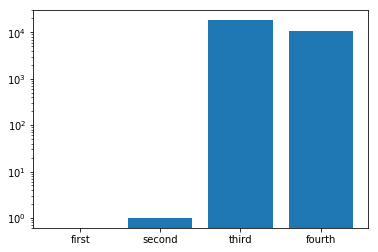

In [19]:
x=[1,2,3,4]
y=[0,1,18202,10683]
tick_label = ['first', 'second', 'third', 'fourth'] 
US_graph=plt.bar(x,y,width=0.8,tick_label = tick_label)
plt.yscale('log')
plt.show()

#since the y-axis number is too huge, we take the log on the y-axis for better representation

# Inference from the graph is the number of deaths In USA
#22nd-31st January month= 0 Deaths
#1st -29th February Month = 1 Deaths
#1st -31st March Month= 18202 Deaths
#1st April -3rd April= 10683 Deaths

# Analysis on China


In [20]:
#finding the Sum of Deaths cases, Confirmed cases, Recovered Cases in China based on each month

China_Death_sum=China_data.groupby('month')['Deaths'].sum()
China_recovery_sum=China_data.groupby('month')['Recovered'].sum()
China_Confirmed_sum=China_data.groupby('month')['Confirmed'].sum()

In [21]:
China_Death_sum,China_Confirmed_sum,China_recovery_sum

(month
 1      889.0
 2    46380.0
 3    98374.0
 4     6630.0
 Name: Deaths, dtype: float64, month
 1      37897.0
 2    1631535.0
 3    2506812.0
 4     163144.0
 Name: Confirmed, dtype: float64, month
 1        810.0
 2     376775.0
 3    2005308.0
 4     152656.0
 Name: Recovered, dtype: float64)

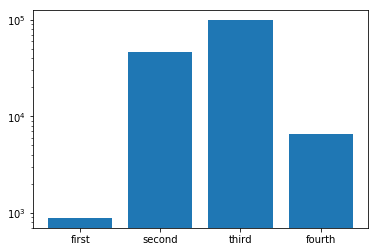

In [22]:
x=[1,2,3,4]
y=[889,46380,98374,6630]
tick_label = ['first', 'second', 'third', 'fourth'] 
US_graph=plt.bar(x,y,width=0.8,tick_label = tick_label)
plt.yscale('log')
plt.show()
#since the y-axis number is too huge, we take the log on the y-axis for better representation

# Inference from the graph is the number of deaths In USA
#22nd-31st January month= 889 Deaths

#1st -29th February Month = 46380 Deaths

#1st -31st March Month= 98374 Deaths

#1st April -3rd April= 6630 Deaths